In [1]:
import numpy as np
import matplotlib.pyplot as plot

from L1.pbil import pbil, population_evaluation

%matplotlib inline

In [2]:
def iterations_limit(max_iterations):
    def stop_iteration(_, best_specimens):
        current_iteration = len(best_specimens)
        return current_iteration >= max_iterations
    return stop_iteration


def one_max(population):
    return np.sum(population, axis=1)


def deceptive_one_max(population):
    sums = np.sum(population, axis=1)
    for i, sum in enumerate(sums):
        if sum == 0:
            sums[i] = len(population) + 1
    # if sum == 0:
    #     sum = len(population) + 1
    return sums


def k_deceptive_one_max(k):
    def concrete_k_deceptive_one_max(population):
        sum = np.zeros(population.shape[0])
        for i in range(k):
            substring_start = i * population.shape[1] // k
            substring_end = (i+1) * population.shape[1] // k - 1
            partial_sums = np.sum(population[:, substring_start:substring_end+1], axis=1)
            for i, partial_sum in enumerate(partial_sums):
                if partial_sum == 0:
                    partial_sums[i] = substring_end - substring_start + 2
            # if partial_sums == 0:
            #     partial_sums = substring_end - substring_start + 2
            sum += partial_sums
        return sum
        
    return concrete_k_deceptive_one_max

In [3]:
model, best_specimens = pbil(one_max, 125, 100, iterations_limit(1000),
                             0.01, 0.05, 0.01)

In [4]:
model

array([ 0.96239967,  0.96367285,  0.976633  ,  0.96752106,  0.95210486,
        0.97057087,  0.98119241,  0.95372303,  0.96933712,  0.96625767,
        0.99258284,  0.97183326,  0.97664979,  0.98398417,  0.94583257,
        0.96608439,  0.99735634,  0.9833314 ,  0.98619195,  0.95813091,
        0.99088794,  0.97979677,  0.98246265,  0.95910919,  0.98299008,
        0.97145895,  0.97604639,  0.98387924,  0.98131428,  0.96676737,
        0.98035018,  0.95561192,  0.97181282,  0.98508512,  0.96844191,
        0.97507073,  0.9886242 ,  0.9770994 ,  0.99162912,  0.96610498,
        0.96826018,  0.97355637,  0.96223896,  0.96830561,  0.9661958 ,
        0.95827491,  0.97998141,  0.98630107,  0.98099306,  0.97691434,
        0.98440191,  0.96969768,  0.98085473,  0.98258824,  0.99575435,
        0.99098089,  0.96765895,  0.98586821,  0.98152275,  0.98022659,
        0.98098435,  0.96932677,  0.97446614,  0.98663307,  0.97032098,
        0.97684439,  0.95460419,  0.97445454,  0.98666075,  0.98

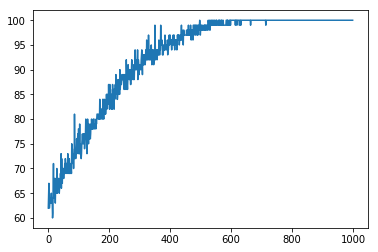

In [5]:
plot.plot(population_evaluation(best_specimens, one_max))

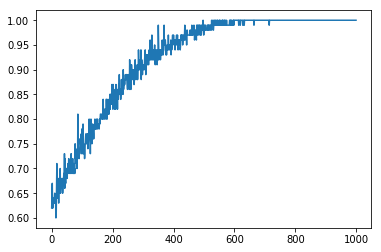

In [6]:
plot.plot(np.average(best_specimens, axis=1))

In [7]:
model, best_specimens = pbil(deceptive_one_max, 125, 100, iterations_limit(1000),
                             0.01, 0.05, 0.01)

In [8]:
model

array([ 0.96722799,  0.98692405,  0.97385684,  0.95681809,  0.98622148,
        0.98136342,  0.95704443,  0.98705181,  0.97790531,  0.97716943,
        0.98741633,  0.95900269,  0.9776832 ,  0.96332312,  0.975244  ,
        0.99462451,  0.98153779,  0.97647881,  0.97271996,  0.9693114 ,
        0.98949445,  0.97773473,  0.97754771,  0.97583121,  0.96758184,
        0.95276405,  0.97952937,  0.9911902 ,  0.98240299,  0.96557331,
        0.95679714,  0.97700963,  0.95546253,  0.97677726,  0.97472923,
        0.97950464,  0.97976852,  0.96813862,  0.98271989,  0.97143764,
        0.95322366,  0.98815081,  0.95854189,  0.96235607,  0.97810881,
        0.9802863 ,  0.9716995 ,  0.97544602,  0.98931979,  0.98720872,
        0.98150705,  0.95073661,  0.96638574,  0.92787824,  0.98259119,
        0.97629571,  0.98275157,  0.97283331,  0.99148788,  0.97815677,
        0.97250779,  0.97040379,  0.9876674 ,  0.970314  ,  0.96781174,
        0.97492575,  0.97501993,  0.98542942,  0.97428486,  0.97

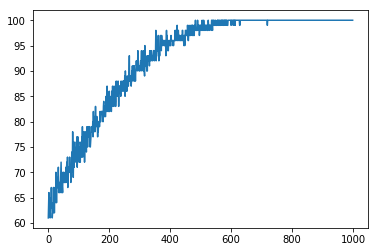

In [9]:
plot.plot(population_evaluation(best_specimens, deceptive_one_max))

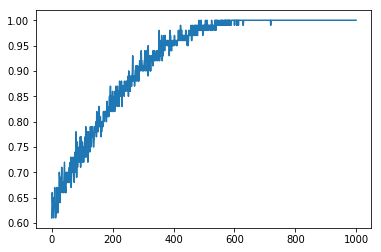

In [10]:
plot.plot(np.average(best_specimens, axis=1))

In [11]:
model, best_specimens = pbil(k_deceptive_one_max(10), 125, 100, iterations_limit(1000),
                             0.01, 0.05, 0.01)

In [12]:
model

array([ 0.99065945,  0.97539492,  0.98030749,  0.98548359,  0.97953191,
        0.98713719,  0.97663368,  0.97651263,  0.9771177 ,  0.96820531,
        0.97793088,  0.99749456,  0.99264053,  0.97549601,  0.9777862 ,
        0.9707088 ,  0.97975752,  0.97676684,  0.97193094,  0.98722389,
        0.98718298,  0.96951328,  0.9524311 ,  0.96929449,  0.97190335,
        0.98210652,  0.98421903,  0.97015151,  0.97413864,  0.99340184,
        0.96789713,  0.97813614,  0.95895633,  0.98408332,  0.96996853,
        0.96855592,  0.97979877,  0.98180601,  0.97042681,  0.98756953,
        0.97706774,  0.97576863,  0.97183301,  0.98697648,  0.96725547,
        0.94996255,  0.98647997,  0.97735337,  0.97477673,  0.96945472,
        0.97082192,  0.9619291 ,  0.96545489,  0.98793502,  0.98046542,
        0.97903482,  0.98948301,  0.97300913,  0.96796616,  0.99222736,
        0.98948901,  0.98263652,  0.97397593,  0.97479363,  0.9666243 ,
        0.97754858,  0.98147431,  0.97259914,  0.97496307,  0.98

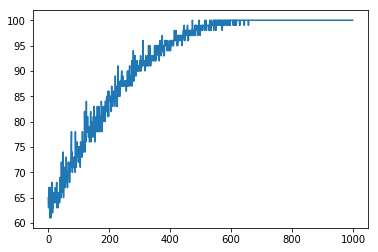

In [13]:
plot.plot(population_evaluation(best_specimens, k_deceptive_one_max(10)))

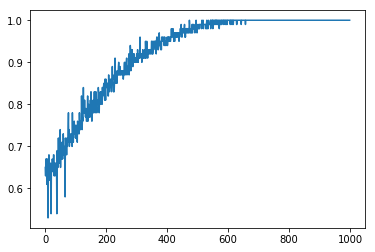

In [14]:
plot.plot(np.average(best_specimens, axis=1))

In [15]:
model, best_specimens = pbil(k_deceptive_one_max(30), 125, 100, iterations_limit(1000),
                             0.01, 0.05, 0.01)
model

array([ 0.02167509,  0.0452286 ,  0.02726015,  0.01391318,  0.03103726,
        0.03002168,  0.02213267,  0.04766635,  0.03444545,  0.04914624,
        0.0474713 ,  0.05179359,  0.02347737,  0.02406365,  0.02870093,
        0.04112896,  0.03355474,  0.06005385,  0.04304033,  0.02368304,
        0.03532683,  0.02327281,  0.00952485,  0.04270868,  0.04422208,
        0.05290298,  0.95021695,  0.9251508 ,  0.93825909,  0.94420503,
        0.03761863,  0.0213694 ,  0.01698204,  0.03151252,  0.03700551,
        0.01607204,  0.93862767,  0.89552195,  0.96046466,  0.97655877,
        0.02944023,  0.04342744,  0.02851186,  0.02213181,  0.03918479,
        0.03856206,  0.96707487,  0.95684868,  0.96580448,  0.914824  ,
        0.02195568,  0.02357369,  0.0133008 ,  0.02442596,  0.02706568,
        0.0453303 ,  0.95744076,  0.94664832,  0.90867086,  0.96383878,
        0.01942864,  0.02624337,  0.00644243,  0.03796512,  0.02212911,
        0.01512312,  0.9487246 ,  0.97246623,  0.98337415,  0.94

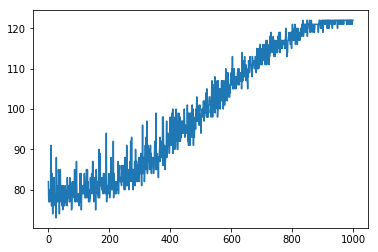

In [16]:
plot.plot(population_evaluation(best_specimens, k_deceptive_one_max(30)))

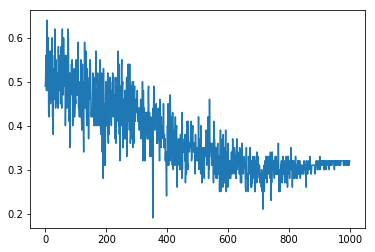

In [17]:
plot.plot(np.average(best_specimens, axis=1))

In [18]:
best = np.array(best_specimens)
best.shape

(1000, 100)

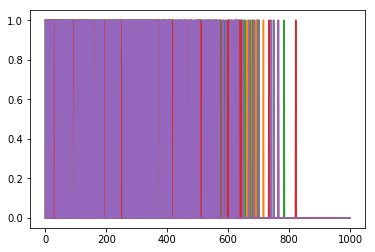

In [19]:
for specimen_idx in range(10, 20, 2):
    plot.plot(best.T[specimen_idx])

In [20]:
model, best_specimens = pbil(k_deceptive_one_max(50), 125, 100, iterations_limit(1000),
                             0.01, 0.05, 0.01)
model

array([ 0.02105806,  0.0131436 ,  0.00762901,  0.01961285,  0.01480146,
        0.01113202,  0.01213841,  0.021248  ,  0.01321012,  0.02569566,
        0.02623319,  0.01569882,  0.01814138,  0.01504286,  0.02846511,
        0.04802384,  0.02692134,  0.0250731 ,  0.01165723,  0.01837907,
        0.04452313,  0.02426598,  0.03063584,  0.0087624 ,  0.03208267,
        0.02795225,  0.01358747,  0.03645728,  0.01566139,  0.03551905,
        0.01975063,  0.01056876,  0.03167006,  0.0259446 ,  0.03309824,
        0.03711163,  0.02493028,  0.01579924,  0.03107124,  0.02909533,
        0.01585964,  0.01692333,  0.04308682,  0.0257702 ,  0.03131799,
        0.01713116,  0.0318866 ,  0.019797  ,  0.03777862,  0.02333706,
        0.02267908,  0.01344448,  0.04119299,  0.02203285,  0.02197882,
        0.0431008 ,  0.02965224,  0.04844572,  0.03259035,  0.0317159 ,
        0.02506706,  0.02371521,  0.03442593,  0.01423276,  0.03978026,
        0.04733989,  0.03879343,  0.02121652,  0.03604785,  0.03

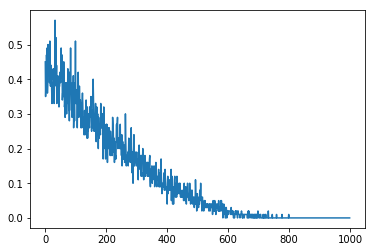

In [21]:
plot.plot(np.average(best_specimens, axis=1))

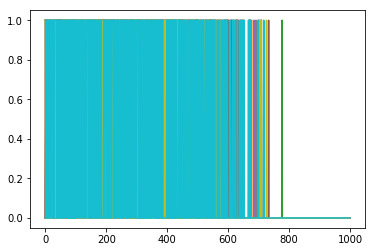

In [22]:
for specimen_idx in range(10):
    plot.plot(best.T[specimen_idx])

In [23]:
model, best_specimens = pbil(k_deceptive_one_max(50), 125, 100, iterations_limit(1000),
                             0.005, 0.05, 0.01)
model

array([ 0.24501954,  0.18730291,  0.173664  ,  0.18801673,  0.13860168,
        0.10891728,  0.11044253,  0.12130327,  0.168625  ,  0.1383481 ,
        0.19031979,  0.15141552,  0.12100345,  0.13725614,  0.16429487,
        0.1780619 ,  0.13551679,  0.11583907,  0.10932419,  0.12081266,
        0.15222892,  0.13676314,  0.17376953,  0.17492886,  0.16524324,
        0.12746105,  0.098675  ,  0.14035167,  0.2006414 ,  0.15963957,
        0.17588213,  0.16123361,  0.14679662,  0.16906376,  0.21723468,
        0.18111445,  0.1677161 ,  0.11874346,  0.13911859,  0.1258655 ,
        0.09290708,  0.10435701,  0.15546733,  0.15830654,  0.17542017,
        0.17083917,  0.09785464,  0.1549622 ,  0.16039633,  0.16447443,
        0.19864424,  0.17940341,  0.15373251,  0.18590684,  0.15031216,
        0.16603352,  0.21301151,  0.18713685,  0.19553101,  0.20186217,
        0.23196833,  0.28571999,  0.16268114,  0.1777961 ,  0.20647389,
        0.16121643,  0.18084336,  0.18164342,  0.16186015,  0.17

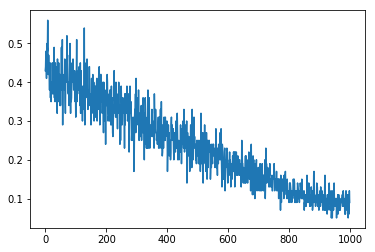

In [24]:
plot.plot(np.average(best_specimens, axis=1))

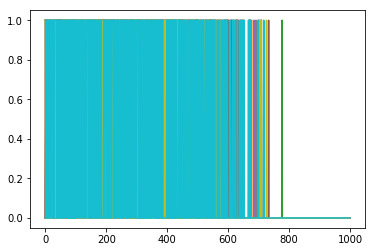

In [25]:
for specimen_idx in range(10):
    plot.plot(best.T[specimen_idx])

In [26]:
model, best_specimens = pbil(k_deceptive_one_max(50), 125, 100, iterations_limit(1000),
                             0.01, 0.02, 0.01)
model

array([ 0.00251403,  0.0078041 ,  0.00908397,  0.00219471,  0.02061309,
        0.01558551,  0.03483235,  0.02319691,  0.00147679,  0.00605291,
        0.0043491 ,  0.01570118,  0.00826036,  0.00194218,  0.02529052,
        0.01290068,  0.00763558,  0.01277709,  0.01568508,  0.01220823,
        0.00770442,  0.01021635,  0.01943428,  0.00865124,  0.00131864,
        0.01540095,  0.01724011,  0.02512004,  0.00668791,  0.00164549,
        0.00332197,  0.02506616,  0.00325869,  0.02675126,  0.02425345,
        0.00201352,  0.00906606,  0.00864013,  0.01672815,  0.00607878,
        0.01640868,  0.00603566,  0.00194096,  0.00334085,  0.01665946,
        0.00940798,  0.0031093 ,  0.00401551,  0.00224423,  0.0057253 ,
        0.01100331,  0.01211177,  0.00412195,  0.01591772,  0.02040956,
        0.02332406,  0.01450792,  0.01978021,  0.00432072,  0.00539312,
        0.00688913,  0.00337242,  0.04170061,  0.01395922,  0.01776933,
        0.00527304,  0.01060822,  0.00573597,  0.01392609,  0.01

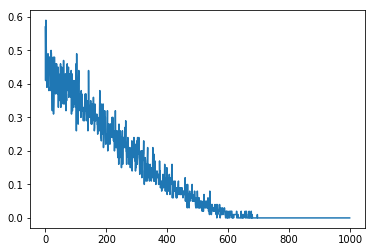

In [27]:
plot.plot(np.average(best_specimens, axis=1))

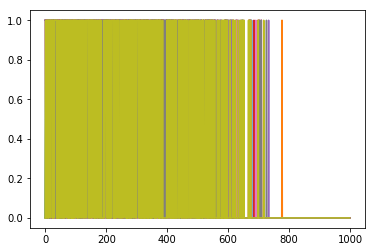

In [28]:
for specimen_idx in range(1, 10):
    plot.plot(best.T[specimen_idx])